In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pySAMetrics
import matplotlib.pyplot as plt
from pySAMetrics.Simulation import Simulation
from pySAMetrics.utils import generate_simulation_paths
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [14]:
simu_list=[]

### add control case
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

def get_paths(i):
    paths = {
    'path_3d': f'/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/3D/split_{i+1}.nc',
    'path_2d': f'/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_{i+1}.nc',
    'path_1d': f'/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_{i+1}.nc'
    }
    return paths

for i in range(10):
    paths=get_paths(i)
    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path=f'/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_{i}')
    simu_list.append(simu)

****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_0/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_1/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_2/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_3/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_4/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_5/RCE_T300_U0_B1_M1
B No dataset found: dataset_computed_2d
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_6/RCE_T300_U0_B1_M1
B No dataset found: dataset_computed_2d
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_7/RCE_T300_U0_B1_M1
B No dataset found: dataset_computed_2d
****/home/ec2-user/DeepCloudLab/processed_classes/long_r

In [15]:
[simu.name for simu in simu_list]

['RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1',
 'RCE_T300_U0_B1_M1']

In [16]:
from pySAMetrics import config

total_range = np.linspace(config.FMSE_MIN, config.FMSE_MAX, 50)
fmse_array_i = simu_list[0].dataset_computed_3d.FMSE.values[100]

fmse_array_i[fmse_array_i>config.FMSE_MAX]=config.FMSE_MAX
fmse_array_i[fmse_array_i<config.FMSE_MIN]=config.FMSE_MIN

nz = len(simu_list[0].dataset_3d.z.values)

output_matrix = np.zeros((nz, 49))
output_matrix_numbers = np.zeros((nz, 49))

for zz in range(nz - 1):

    ind_xy = np.array(
        [
            np.where(
                np.logical_and(
                    total_range[i] <= fmse_array_i[zz],
                    fmse_array_i[zz] <= total_range[i + 1],
                )
            )
            for i in range(total_range.shape[0] - 1)
        ],
        dtype="object",
    )

    output_matrix[zz, :] = [len(ind_xy[i][0])/(128*128) for i in range(total_range.shape[0] - 1)]
    output_matrix_numbers[zz, :] = [len(ind_xy[i][0]) for i in range(total_range.shape[0] - 1)]
    


In [17]:
output_matrix[output_matrix==0]=np.nan
output_matrix_numbers[output_matrix_numbers==0]=np.nan

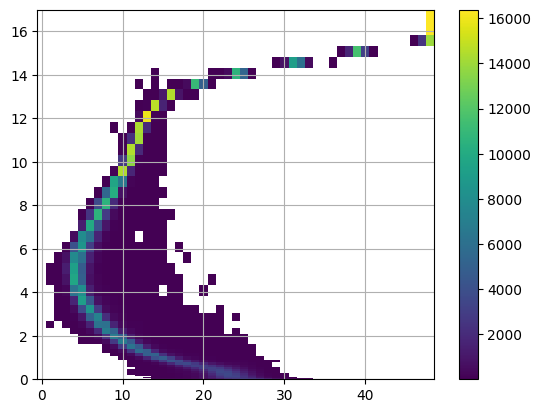

In [19]:
fmse = simu_list[0].dataset_isentropic.fmse.values[:-1]
z = simu_list[0].dataset_3d.z.values / 1000
XX, ZZ = np.meshgrid(fmse, z)


# Plot the result
plt.pcolormesh(XX, ZZ, output_matrix_numbers)
plt.colorbar()
# plt.clim(1000, 10000)
plt.ylim(0, 17)
plt.grid()
plt.show()


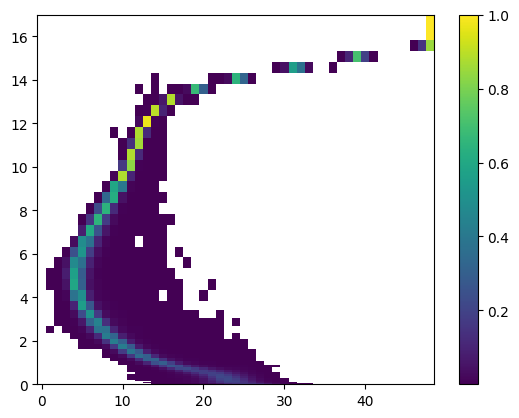

In [20]:
fmse = simu_list[0].dataset_isentropic.fmse.values[:-1]
z = simu_list[0].dataset_3d.z.values / 1000
XX, ZZ = np.meshgrid(fmse, z)


# Plot the result
plt.pcolormesh(XX, ZZ, output_matrix)
plt.colorbar()
# plt.clim(1000, 10000)
plt.ylim(0, 17)
plt.show()


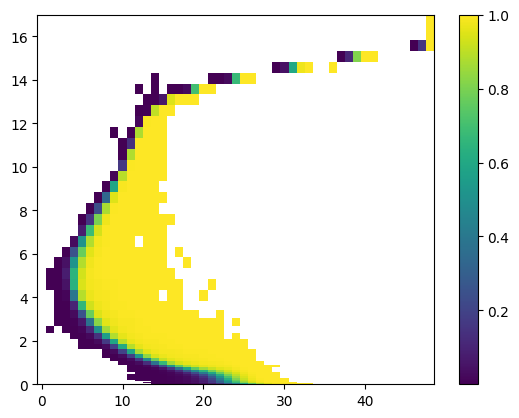

In [8]:
fmse = simu_list[0].dataset_isentropic.fmse.values[:-1]
z = simu_list[0].dataset_3d.z.values / 1000
XX, ZZ = np.meshgrid(fmse, z)

# Create the mask to identify NaN values
mask = np.isnan(output_matrix)

# Apply cumsum to the non-NaN values
cumsum_output = np.cumsum(np.nan_to_num(output_matrix), axis=-1)

# Restore NaN values in the result
cumsum_output[mask] = np.nan

# Plot the result
plt.pcolormesh(XX, ZZ, cumsum_output)
plt.colorbar()
# plt.clim(1000, 10000)
plt.ylim(0, 17)
plt.show()


In [88]:
rho_w = simu_list[0].dataset_computed_3d.RHO_W[10, 10].values
tabs = simu_list[0].dataset_3d.TABS[10, 10].values
buo = simu_list[0].dataset_computed_3d.BUOYANCY[10, 10].values
qv = simu_list[0].dataset_3d.QV[10, 10].values
qp = simu_list[0].dataset_3d.QP[10, 10].values

fmse = simu_list[0].dataset_computed_3d.FMSE[10, 10].values

In [89]:
np.where((fmse>total_range[i]))

(array([], dtype=int64), array([], dtype=int64))

In [28]:
ind_xy = np.array(
    [
        np.where(
            np.logical_and(
                total_range[i] <= fmse,
                fmse <= total_range[i + 1],
            )
        )
        for i in range(total_range.shape[0] - 1)
    ],
    dtype="object",
)

array([], dtype=float32)

In [52]:
hist_rho_w = np.histogram(rho_w[ind_xy[10][0], ind_xy[10][1]], bins=20)

In [57]:
hist_rho_w

(array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([-1.0758047 , -0.98056144, -0.8853181 , -0.7900748 , -0.6948315 ,
        -0.5995882 , -0.5043449 , -0.4091016 , -0.3138583 , -0.218615  ,
        -0.12337169, -0.02812839,  0.06711491,  0.16235821,  0.25760153,
         0.35284483,  0.4480881 ,  0.54333144,  0.6385747 ,  0.73381805,
         0.8290613 ], dtype=float32))

In [61]:
list_all_hist=[]
for ii, ind in enumerate(ind_xy):
    if len(ind[0])==0:
        hist_rho_w = np.zeros((20))
    else:
        hist_rho_w = np.histogram(rho_w[ind[0], ind[1]], bins=20)[1][:20]
    list_all_hist.append(hist_rho_w)

In [62]:
list_all_hist = np.array(list_all_hist)

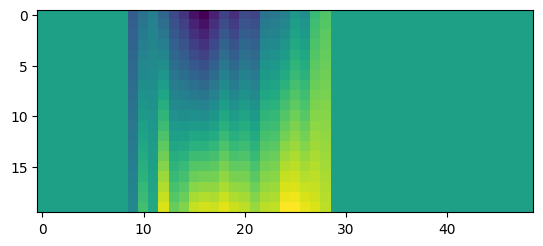

In [65]:
plt.imshow(list_all_hist.T)

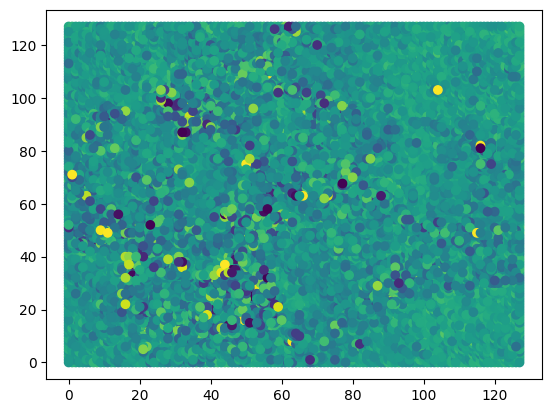

In [69]:
for ind in ind_xy:
    #rho_w2 = np.zeros_like(rho_w)
    #rho_w2[ind[0], ind[1]] = rho_w[ind[0], ind[1]]
    plt.scatter(ind[0], ind[1], c=rho_w[ind[0], ind[1]])


/tmp/ipykernel_12810/2083731880.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 20)


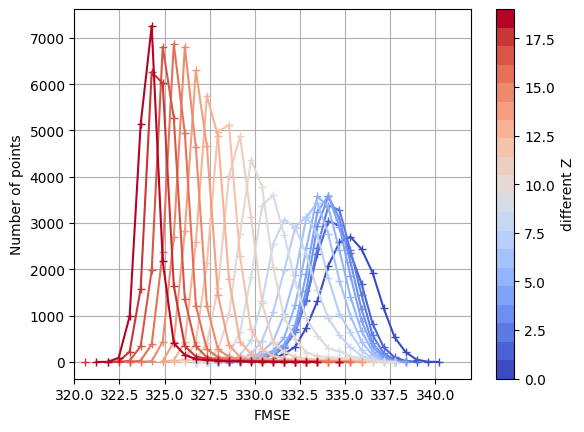

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set up the color map from blue to red
cmap = cm.get_cmap('coolwarm', 20)
norm = mcolors.Normalize(vmin=0, vmax=19)  # Normalize between 0 and 29 for the range of i

# Create a figure and axis
fig, ax = plt.subplots()

# Create a scalar mappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Plot the lines with colors from the colormap
for i in range(20):
    ax.plot(total_range[:-1]/1000, output_matrix_numbers[i, :], '+-', color=cmap(i))

# Add the colorbar and label it
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('different Z')

# Set axis labels and grid
ax.set_xlabel('FMSE')
ax.set_ylabel('Number of points')
ax.grid()
ax.set_xlim(320, 342)

# Display the plot
plt.show()


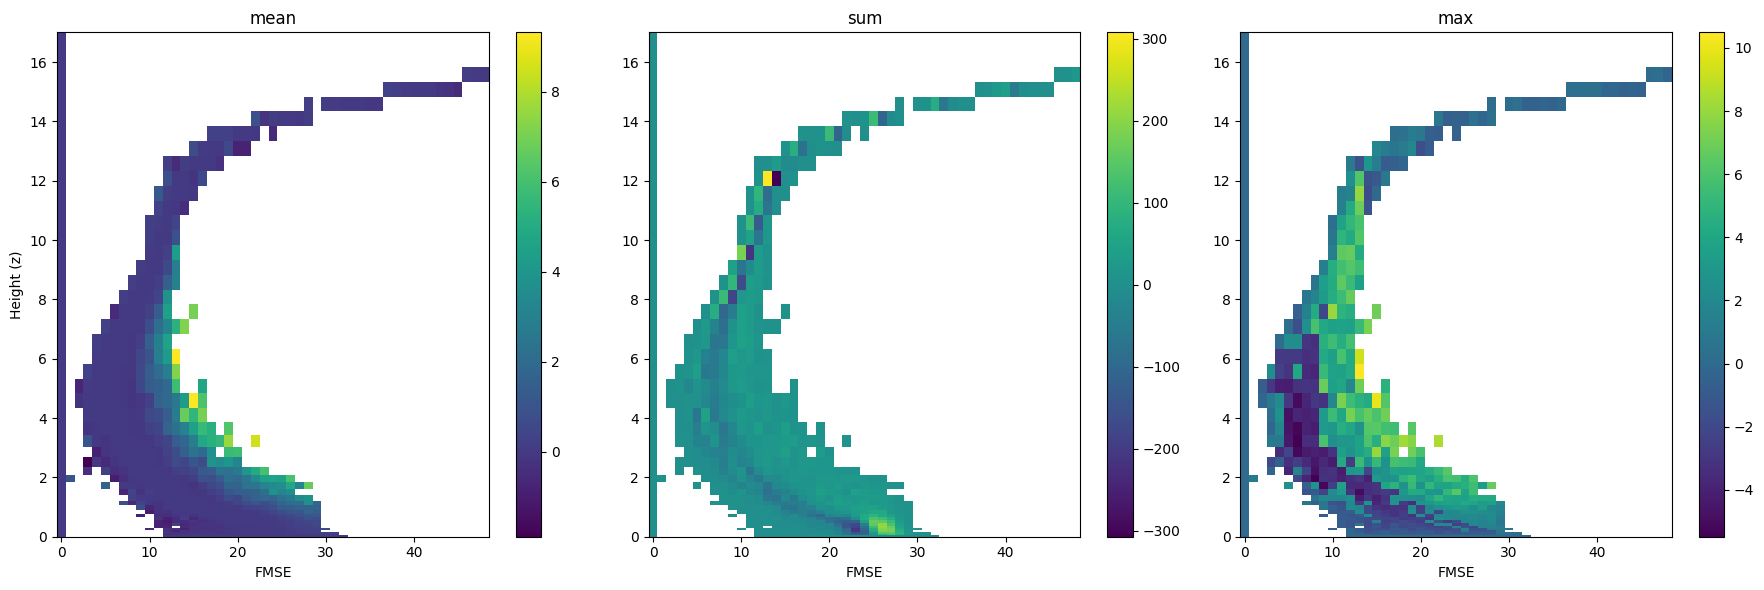

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define your coordinates
fmse = simu_list[0].dataset_isentropic.fmse.values[:-1]
z = simu_list[0].dataset_3d.z.values / 1000
XX, ZZ = np.meshgrid(fmse, z)

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjust size as needed

# Plot the first output_matrix on the first subplot
pcm1 = axs[0].pcolormesh(XX, ZZ, simu_list[0].dataset_isentropic.RHO_W_mean.values[10,:, :-1], shading='auto')
fig.colorbar(pcm1, ax=axs[0])  # Add colorbar to this subplot
axs[0].set_ylim(0, 17)
axs[0].set_title('mean')
axs[0].set_xlabel('FMSE')
axs[0].set_ylabel('Height (z)')

# Plot the second output_matrix (could be a modified version or another matrix) on the second subplot
pcm2 = axs[1].pcolormesh(XX, ZZ, simu_list[0].dataset_isentropic.RHO_W_sum.values[10,:, :-1], shading='auto')
fig.colorbar(pcm2, ax=axs[1])
axs[1].set_ylim(0, 17)
axs[1].set_title('sum')
axs[1].set_xlabel('FMSE')

# Plot the third output_matrix on the third subplot
pcm3 = axs[2].pcolormesh(XX, ZZ, simu_list[0].dataset_isentropic.RHO_W_max.values[10,:, :-1], shading='auto')
fig.colorbar(pcm3, ax=axs[2])
axs[2].set_ylim(0, 17)
axs[2].set_title('max')
axs[2].set_xlabel('FMSE')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
i_t=332

# Extract the 2D mask and 3D FMSE array

mask_2d = simu_list[0].dataset_computed_2d.CP_BINARY[i_t].values  # Shape: (128, 128)
fmse_array_i = simu_list[0].dataset_computed_3d.FMSE[i_t].values  # Shape: (64, 128, 128)
data_array_i = simu_list[0].dataset_computed_3d.RHO_W[i_t].values

# Initialize the 3D mask as a 3D array of zeros with the same shape as fmse_array_i
mask_3d = np.zeros(fmse_array_i.shape)

# Set the first 5 layers of the 3D mask to the 2D mask
mask_3d[:50, :, :] = mask_2d  # Broadcasting the 2D mask to the first 5 layers

# Apply the 3D mask to the FMSE array
masked_fmse_array_i = fmse_array_i * mask_3d  # Masked FMSE array

# If you want to keep FMSE values where the mask is 1 and set others to NaN:
masked_fmse_array_i_with_nan = np.where(mask_3d == 1, fmse_array_i, np.nan)

# Now you can use masked_fmse_array_i or masked_fmse_array_i_with_nan for further analysis or plotting


In [12]:
from pySAMetrics import config

total_range = np.linspace(config.FMSE_MIN, config.FMSE_MAX, 50)
fmse_array_i = masked_fmse_array_i_with_nan

fmse_array_i[fmse_array_i>config.FMSE_MAX]=config.FMSE_MAX
fmse_array_i[fmse_array_i<config.FMSE_MIN]=config.FMSE_MIN

nz = len(simu_list[0].dataset_3d.z.values)

output_matrix_cp = np.zeros((nz, 49))
output_matrix_numbers_cp = np.zeros((nz, 49))

for zz in range(nz - 1):

    ind_xy = np.array(
        [
            np.where(
                np.logical_and(
                    total_range[i] <= fmse_array_i[zz],
                    fmse_array_i[zz] <= total_range[i + 1],
                )
            )
            for i in range(total_range.shape[0] - 1)
        ],
        dtype="object",
    )

    output_matrix_cp[zz, :] = [len(ind_xy[i][0])/(128*128) for i in range(total_range.shape[0] - 1)]
    output_matrix_numbers_cp[zz, :] = [len(ind_xy[i][0]) for i in range(total_range.shape[0] - 1)]
    


In [13]:
output_matrix_cp[output_matrix_cp==0]=np.nan

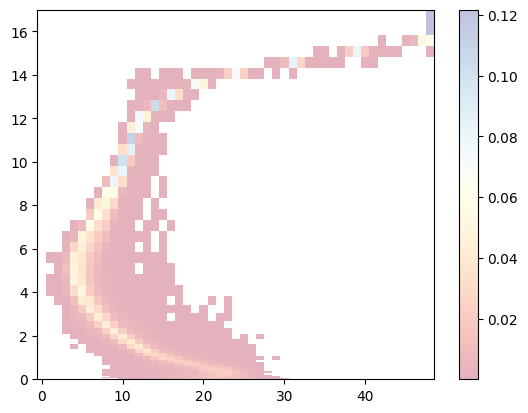

In [14]:
fmse = simu_list[0].dataset_isentropic.fmse.values[:-1]
z = simu_list[0].dataset_3d.z.values / 1000
XX, ZZ = np.meshgrid(fmse, z)

# Plot the result
#plt.pcolormesh(XX, ZZ, output_matrix)
#plt.ylim(0, 17)
#plt.show()
plt.pcolormesh(XX, ZZ, output_matrix_cp, cmap='RdYlBu', alpha=0.3)
#plt.plot(np.mean(fmse_array_i, axis=(1,2)), z)
plt.colorbar()
# plt.clim(1000, 10000)
plt.ylim(0, 17)

plt.show()




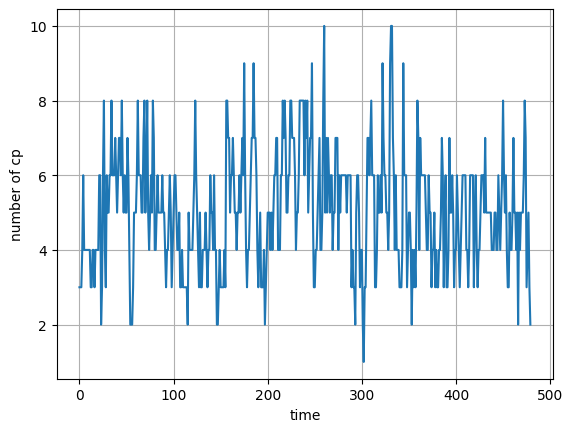

In [15]:
nb_cp =[len(np.unique(simu_list[0].dataset_computed_2d.CP_LABELS.values[i])) for i in range(480)]
plt.plot(nb_cp)
plt.ylabel('number of cp')
plt.xlabel('time')
plt.grid()

In [16]:
from pySAMetrics import config

bin_mode = 'mean'

total_range = np.linspace(config.FMSE_MIN, config.FMSE_MAX, 50)
fmse_array_i = masked_fmse_array_i_with_nan

fmse_array_i[fmse_array_i>config.FMSE_MAX]=config.FMSE_MAX
fmse_array_i[fmse_array_i<config.FMSE_MIN]=config.FMSE_MIN

nz = len(simu_list[0].dataset_3d.z.values)

output_matrix = np.zeros((nz, 49))
output_matrix_numbers = np.zeros((nz, 49))

for zz in range(nz - 1):

    ind_xy = np.array(
        [
            np.where(
                np.logical_and(
                    total_range[i] <= fmse_array_i[zz],
                    fmse_array_i[zz] <= total_range[i + 1],
                )
            )
            for i in range(total_range.shape[0] - 1)
        ],
        dtype="object",
    )
"""
value_zz_fmse=[]
for i in range(len(ind_xy)):
    arr = data_array_i[zz, ind_xy[i][0], ind_xy[i][1]]
    if len(arr>0):
        #mean_value_zz_fmse.append(arr[np.argmax(np.absolute(arr))])
        if bin_mode=='sum':
            value_zz_fmse.append(np.sum(arr))
        elif bin_mode=='mean':
            value_zz_fmse.append(np.mean(arr))
        elif bin_mode=='max':
            value_zz_fmse.append(arr[np.argmax(np.absolute(arr))])

    else:
        value_zz_fmse.append(np.nan)

    output_matrix[zz, 1:] = value_zz_fmse
    #output_matrix[zz, :] = [np.mean(data_array_i[zz, ind_xy[i][0],ind_xy[i][1]]) for i in range(total_range.shape[0] - 1)]
    #output_matrix_numbers[zz, :] = [len(ind_xy[i][0]) for i in range(total_range.shape[0] - 1)]
"""    


"\nvalue_zz_fmse=[]\nfor i in range(len(ind_xy)):\n    arr = data_array_i[zz, ind_xy[i][0], ind_xy[i][1]]\n    if len(arr>0):\n        #mean_value_zz_fmse.append(arr[np.argmax(np.absolute(arr))])\n        if bin_mode=='sum':\n            value_zz_fmse.append(np.sum(arr))\n        elif bin_mode=='mean':\n            value_zz_fmse.append(np.mean(arr))\n        elif bin_mode=='max':\n            value_zz_fmse.append(arr[np.argmax(np.absolute(arr))])\n\n    else:\n        value_zz_fmse.append(np.nan)\n\n    output_matrix[zz, 1:] = value_zz_fmse\n    #output_matrix[zz, :] = [np.mean(data_array_i[zz, ind_xy[i][0],ind_xy[i][1]]) for i in range(total_range.shape[0] - 1)]\n    #output_matrix_numbers[zz, :] = [len(ind_xy[i][0]) for i in range(total_range.shape[0] - 1)]\n"

In [17]:
ind_xy

array([], shape=(49, 2, 0), dtype=object)

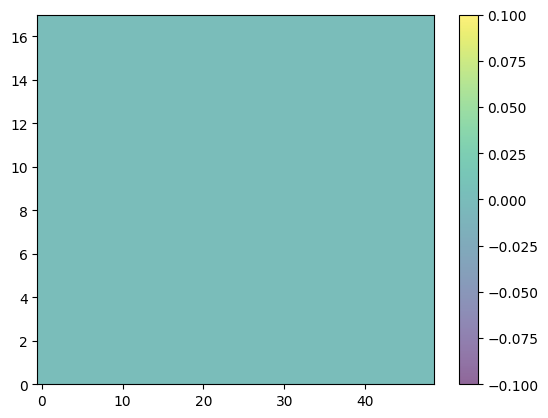

In [95]:
fmse = simu_list[0].dataset_isentropic.fmse.values[:-1]
z = simu_list[0].dataset_3d.z.values / 1000
XX, ZZ = np.meshgrid(fmse, z)

# Plot the result
plt.pcolormesh(XX, ZZ, output_matrix, alpha=0.6)

#plt.plot(np.mean(fmse_array_i, axis=(1,2)), z)
plt.colorbar()
# plt.clim(1000, 10000)
plt.ylim(0, 17)
plt.show()


In [98]:
fmse_array_i = simu_list[0].dataset_computed_3d.FMSE[332].values
zz=12
ind_xy = np.array(
        [
            np.where(
                np.logical_and(
                    total_range[i] <= fmse_array_i[zz],
                    fmse_array_i[zz] <= total_range[i + 1],
                )
            )
            for i in range(total_range.shape[0] - 1)
        ],
        dtype="object",
    )

In [99]:
len(ind_xy)

49

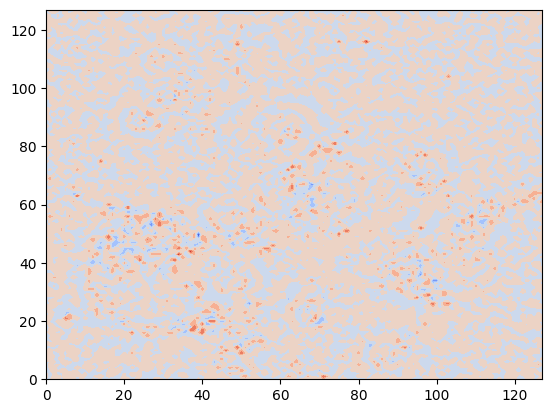

In [81]:
plt.contourf(rho_w, cmap='coolwarm')

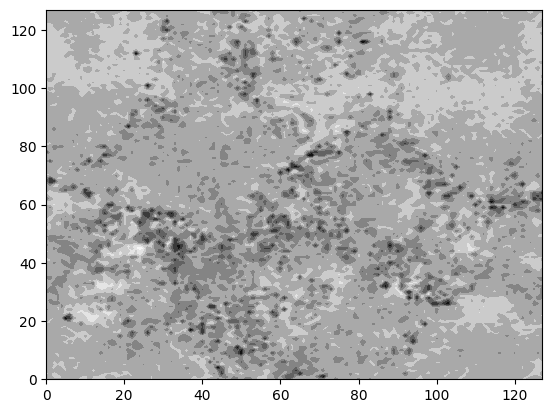

In [83]:

plt.contourf(fmse, cmap='Greys')

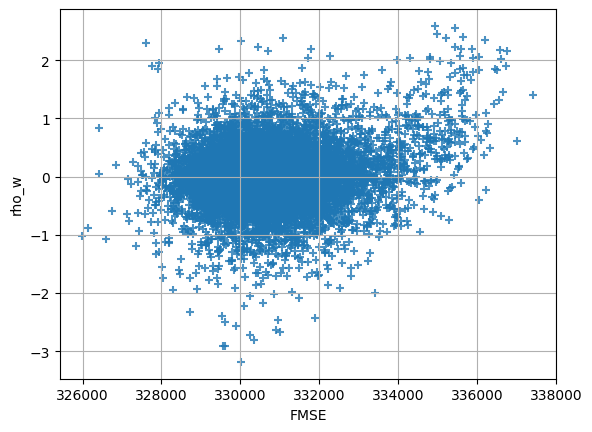

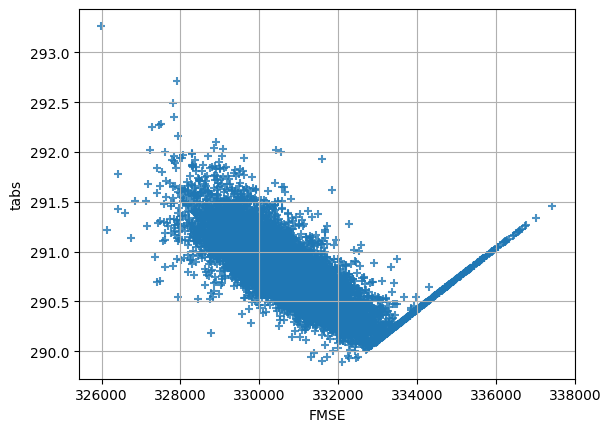

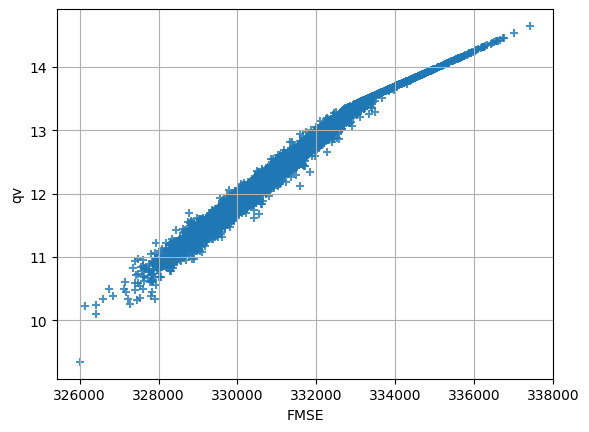

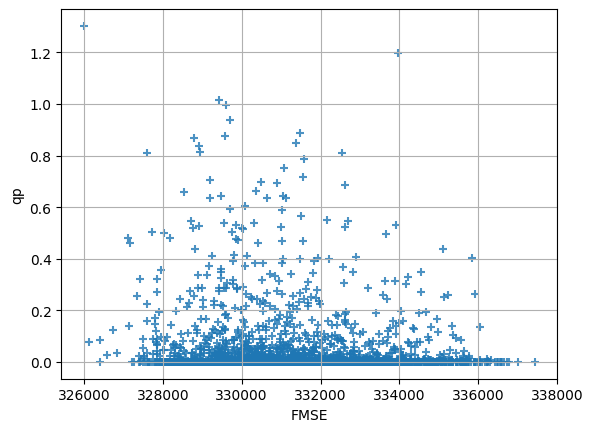

In [95]:
for var, name in zip([rho_w.flatten(), tabs.flatten(), qv.flatten(),qp.flatten() ], ['rho_w', 'tabs', 'qv', 'qp']):
    plt.scatter(fmse.flatten(), var, marker='+', alpha=0.8)


    plt.grid()
    plt.xlabel('FMSE')
    plt.ylabel(f'{name}')
    plt.show()

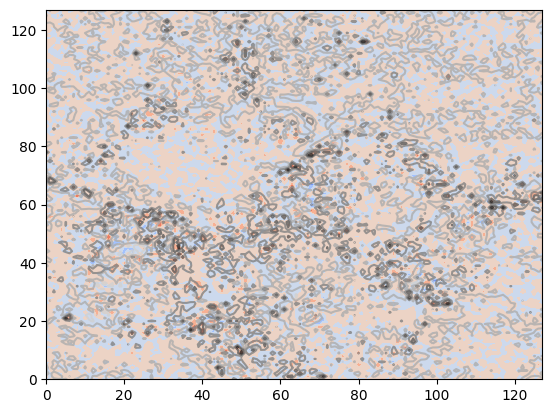

In [ ]:

plt.contour(fmse, 5, cmap='Greys', alpha=0.8)

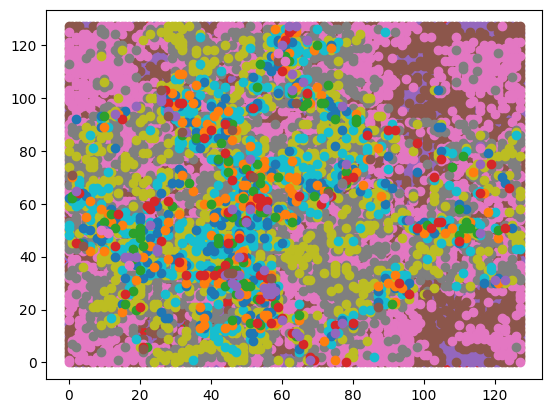

In [70]:
for i in range(1,40):
    plt.scatter(ind_xy[i][0], ind_xy[i][1])#, alpha=((25-i)/25))
    

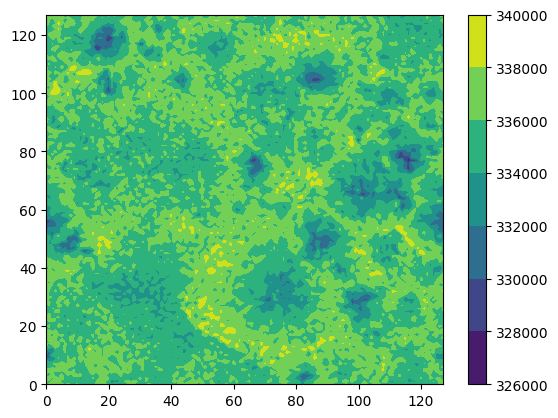

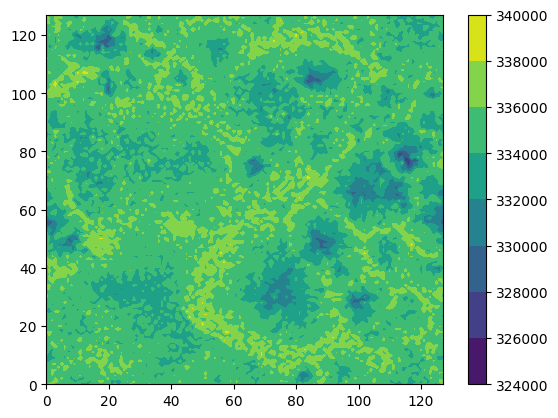

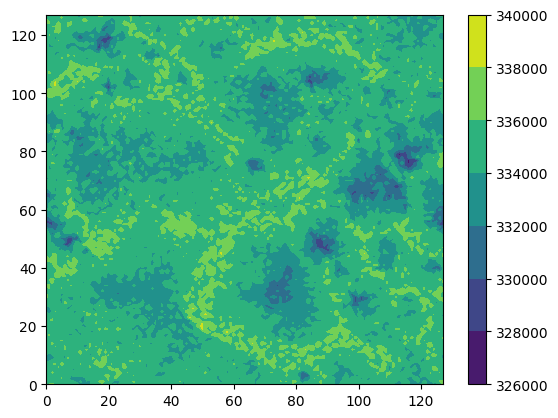

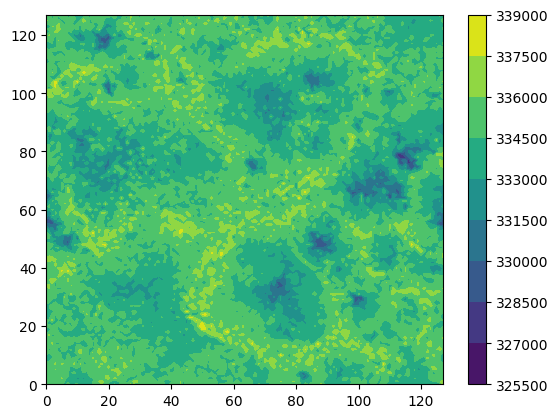

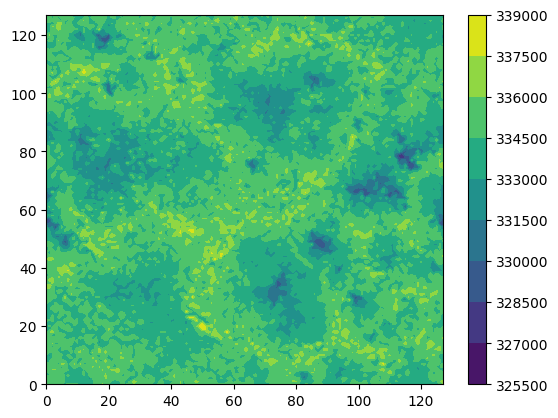

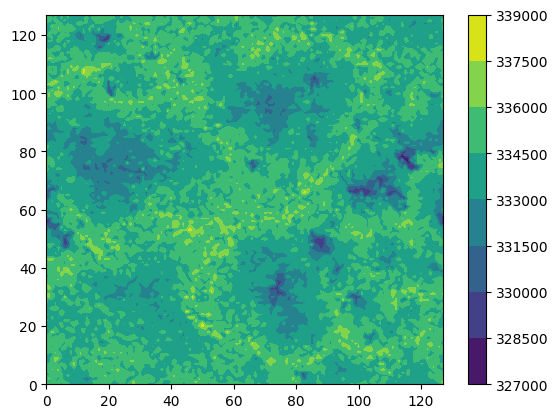

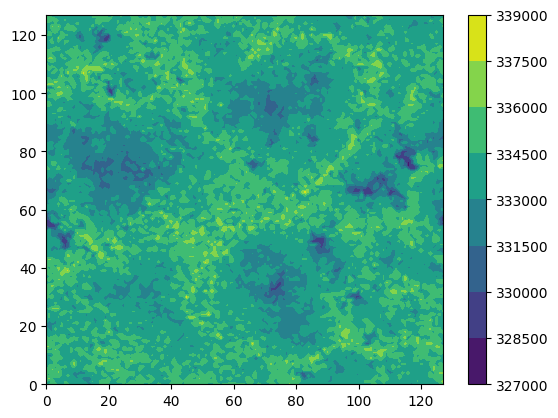

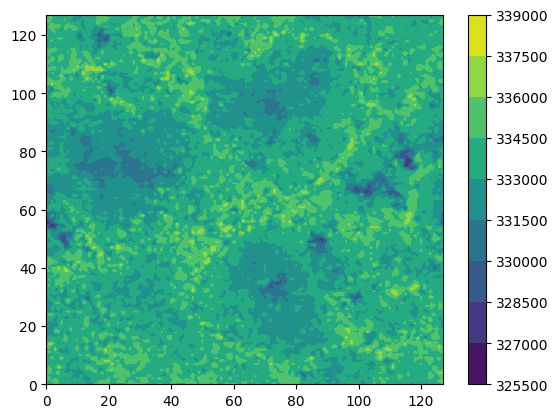

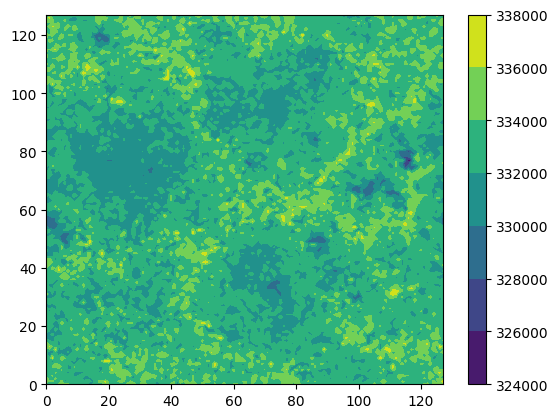

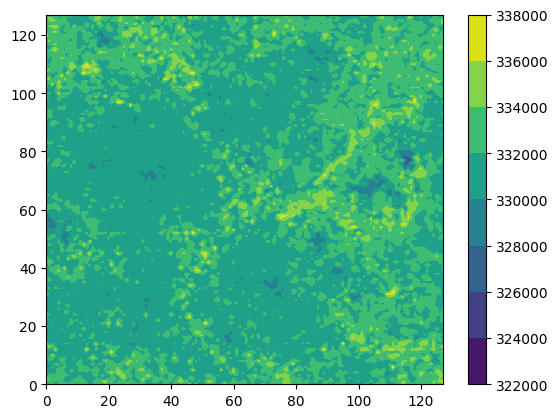

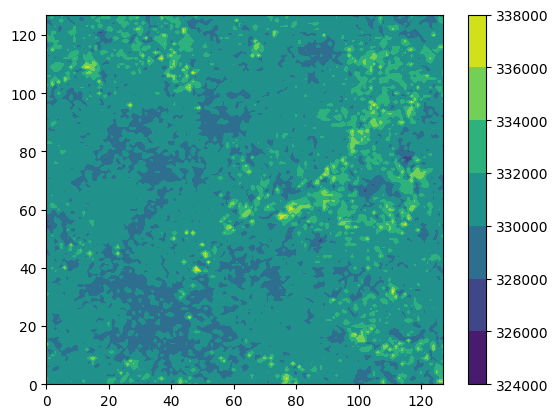

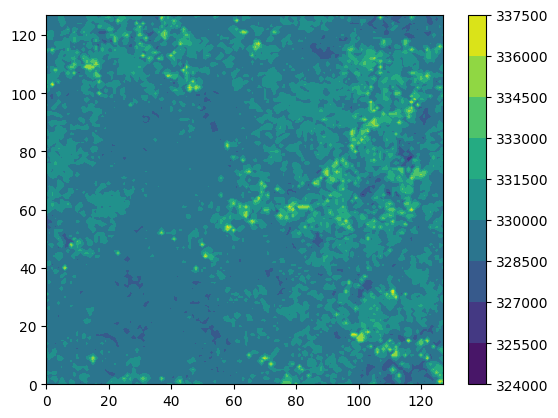

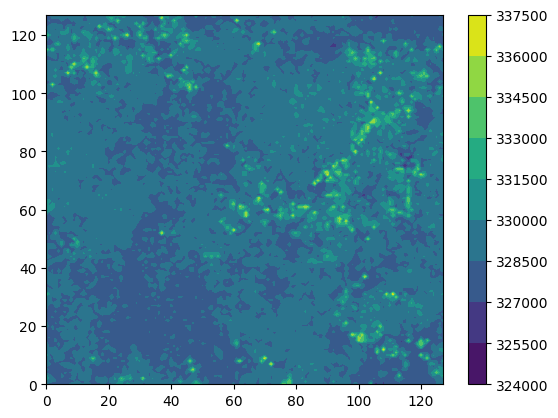

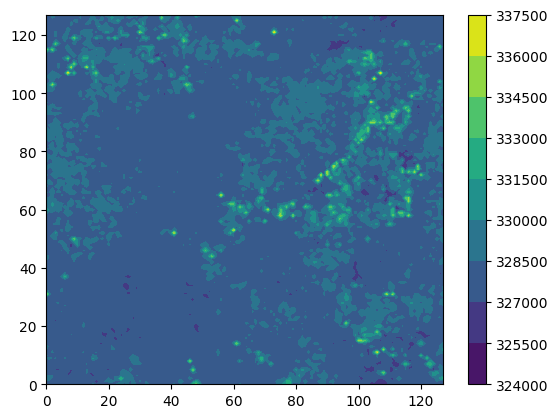

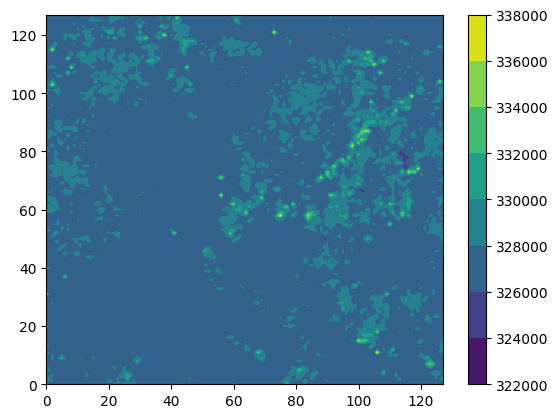

In [107]:
for i in range(15):
    plt.contourf(simu_list[0].dataset_computed_3d.FMSE[40, i].values.T)
    plt.colorbar()
    plt.show()






In [23]:
def extract_periodic_subdomain(array, x_center, y_center, nx_sub, ny_sub):
    """
    Extracts a subdomain from a doubly periodic domain around a given center.
    
    Parameters:
    - array: 2D array (image) from which to extract the subdomain.
    - x_center: The x-coordinate of the center of the subdomain.
    - y_center: The y-coordinate of the center of the subdomain.
    - nx_sub: The width of the subdomain.
    - ny_sub: The height of the subdomain.

    Returns:
    - subdomain: The extracted subdomain as a 2D array.
    """
    nx, ny = array.shape  # Full domain size
    
    # Create a grid of indices for the subdomain, considering periodic boundaries
    x_indices = (np.arange(x_center - nx_sub // 2, x_center + nx_sub // 2) % nx)
    y_indices = (np.arange(y_center - ny_sub // 2, y_center + ny_sub // 2) % ny)
    
    # Extract the subdomain
    subdomain = array[np.ix_(x_indices, y_indices)]
    
    return subdomain


import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import warnings
from pySAMetrics import config
from scipy.ndimage import generic_filter
from tqdm import tqdm
from joblib import Parallel, delayed  # For parallelization

def variance_filter(array, nx_sub, ny_sub):
    """Apply a variance filter over the image with a window size of (nx_sub, ny_sub)."""
    return generic_filter(array, np.var, size=(nx_sub, ny_sub))

def find_most_variable_subdomain_via_filter(array_2d, nx_sub, ny_sub):
    """Find the subdomain of size (nx_sub, ny_sub) with the strongest variability using a filter."""
    # Apply a variance filter over the array
    variability_map = variance_filter(array_2d, nx_sub, ny_sub)
    
    # Find the coordinates of the maximum variability
    max_coords = np.unravel_index(np.argmax(variability_map), variability_map.shape)
    
    return max_coords, np.max(variability_map)

In [49]:


def process_vertical_level(zz, fmse_array_i, data_array_i, nx_sub, ny_sub, total_range, bin_mode):
    """Process a single vertical level in parallel."""
    # Find the most variable subdomain for this vertical level using the filter
    (best_x, best_y), max_variability = find_most_variable_subdomain_via_filter(fmse_array_i[zz], nx_sub, ny_sub)
    
    # Extract the most variable subdomain
    sub_fmse_array = extract_periodic_subdomain(fmse_array_i[zz], best_x, best_y, nx_sub, ny_sub)
    sub_data_array = extract_periodic_subdomain(data_array_i[zz], best_x, best_y, nx_sub, ny_sub)
    
    ind_xy = np.array(
        [
            np.where(
                np.logical_and(
                    total_range[i] <= sub_fmse_array,
                    sub_fmse_array <= total_range[i + 1],
                )
            )
            for i in range(total_range.shape[0] - 1)
        ],
        dtype="object",
    )

    value_zz_fmse = []
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        for i in range(len(ind_xy)):
            arr = sub_data_array[ind_xy[i][0], ind_xy[i][1]]
            if len(arr) > 0:
                if bin_mode == 'sum':
                    value_zz_fmse.append(np.sum(arr))
                elif bin_mode == 'mean':
                    value_zz_fmse.append(np.mean(arr))
                elif bin_mode == 'max':
                    value_zz_fmse.append(arr[np.argmax(np.absolute(arr))])
            else:
                value_zz_fmse.append(np.nan)
    
    return value_zz_fmse

def diagnostic_fmse_z_window(
    fmse_array: np.array,
    z_array: np.array,
    data_array: np.array,
    time_step: int,
    nb_bins_fmse: int = 50,
    fmse_range: str = "max",
    bin_mode='max',
    nx_sub=32,  # Define subdomain size for x
    ny_sub=32,   # Define subdomain size for y
    n_jobs=-1    # Number of parallel jobs (-1 means use all available cores)
):
    
    if type(data_array) not in [
        list,
        np.array,
        xr.core.dataarray.DataArray,
        np.ndarray,
    ]:
        print('mmm', type(data_array))
        raise ValueError(
            "data_array type is not standard, must be in [list, np.array, xarray.core.dataarray.DataArray, np.ndarray,]"
        )

    if type(data_array) not in [
        list,
        np.array,
        np.ndarray,
    ]:
        data_array = data_array.values

    if fmse_range not in ["max", "1-percentile"]:
        raise ValueError("fmse_range must be in [max, 1_percentile]")

    nz = z_array.shape[0]
    output_matrix = np.zeros((nz, nb_bins_fmse))

    data_array_i = data_array[time_step]
    fmse_array_i = fmse_array[time_step]

    if fmse_range == "max":
        total_min, total_max = (np.min(fmse_array_i), np.max(fmse_array_i))

    if fmse_range == "1-percentile":
        total_min, total_max = (np.percentile(fmse_array_i, 1), np.percentile(fmse_array_i, 99))

    total_range = np.linspace(config.FMSE_MIN, config.FMSE_MAX, nb_bins_fmse)

    fmse_array_i[fmse_array_i > config.FMSE_MAX] = config.FMSE_MAX
    fmse_array_i[fmse_array_i < config.FMSE_MIN] = config.FMSE_MIN

    # Use joblib to parallelize the processing of vertical levels
    results = Parallel(n_jobs=n_jobs)(
        delayed(process_vertical_level)(
            zz, fmse_array_i, data_array_i, nx_sub, ny_sub, total_range, bin_mode
        )
        for zz in tqdm(range(nz - 1), desc="Processing vertical levels")
    )

    # Fill the output matrix with the results from the parallel processing
    for zz, value_zz_fmse in enumerate(results):
        output_matrix[zz, 1:] = value_zz_fmse

    return output_matrix


In [89]:
process_vertical_level(zz=30,
                        fmse_array_i=simu_list[0].dataset_computed_3d.FMSE[332].values, 
                        data_array_i=simu_list[0].dataset_computed_3d.RHO_W[332].values, 
                        sub_fmse=sub_indices,
                        total_range = np.linspace(config.FMSE_MIN, config.FMSE_MAX, 50),
                        bin_mode='max')

mmm (128, 128)
mmm (64, 64, 2, 128)
(64, 64, 2, 128) (64, 64, 2, 128)


IndexError: index 19052 is out of bounds for axis 0 with size 128

In [93]:
fmse_arr_i = simu_list[0].dataset_computed_3d.FMSE[332].values
print('fmse_arr_i shape', fmse_arr_i.shape)
print('sub_indices shape', sub_indices.shape)
sub_fmse = fmse_arr_i[3][sub_indices]
print('sub_fmse', sub_fmse.shape)

fmse_arr_i shape (64, 128, 128)
sub_indices shape (64, 64, 2)
sub_fmse (64, 64, 2, 128)


In [88]:


def process_vertical_level(zz, fmse_array_i, data_array_i, sub_fmse, total_range, bin_mode):
    """Process a single vertical level in parallel."""
    
    # Extract the most variable subdomain
    print('mmm', fmse_array_i[zz].shape)
    sub_fmse_array = fmse_array_i[zz][sub_fmse]
    sub_data_array = data_array_i[zz][sub_fmse]
    print('mmm', sub_fmse_array.shape)

    print(sub_fmse_array.shape, sub_data_array.shape)
    
    ind_xy = np.array(
        [
            np.where(
                np.logical_and(
                    total_range[i] <= sub_fmse_array,
                    sub_fmse_array <= total_range[i + 1],
                )
            )
            for i in range(total_range.shape[0] - 1)
        ],
        dtype="object",
    )

    value_zz_fmse = []
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        for i in range(len(ind_xy)):
            arr = sub_data_array[ind_xy[i][0], ind_xy[i][1]]
            if len(arr) > 0:
                if bin_mode == 'sum':
                    value_zz_fmse.append(np.sum(arr))
                elif bin_mode == 'mean':
                    value_zz_fmse.append(np.mean(arr))
                elif bin_mode == 'max':
                    value_zz_fmse.append(arr[np.argmax(np.absolute(arr))])
            else:
                value_zz_fmse.append(np.nan)
    
    return value_zz_fmse

def diagnostic_fmse_z_window(
    fmse_array: np.array,
    z_array: np.array,
    data_array: np.array,
    time_step: int,
    nb_bins_fmse: int = 50,
    fmse_range: str = "max",
    bin_mode='max'
    ):
    
    if type(data_array) not in [
        list,
        np.array,
        xr.core.dataarray.DataArray,
        np.ndarray,
    ]:
        print('mmm', type(data_array))
        raise ValueError(
            "data_array type is not standard, must be in [list, np.array, xarray.core.dataarray.DataArray, np.ndarray,]"
        )

    if type(data_array) not in [
        list,
        np.array,
        np.ndarray,
    ]:
        data_array = data_array.values

    if fmse_range not in ["max", "1-percentile"]:
        raise ValueError("fmse_range must be in [max, 1_percentile]")

    nz = z_array.shape[0]
    output_matrix = np.zeros((nz, nb_bins_fmse))

    data_array_i = data_array[time_step]
    fmse_array_i = fmse_array[time_step]

    if fmse_range == "max":
        total_min, total_max = (np.min(fmse_array_i), np.max(fmse_array_i))

    if fmse_range == "1-percentile":
        total_min, total_max = (np.percentile(fmse_array_i, 1), np.percentile(fmse_array_i, 99))

    total_range = np.linspace(config.FMSE_MIN, config.FMSE_MAX, nb_bins_fmse)

    fmse_array_i[fmse_array_i > config.FMSE_MAX] = config.FMSE_MAX
    fmse_array_i[fmse_array_i < config.FMSE_MIN] = config.FMSE_MIN

    # Use joblib to parallelize the processing of vertical levels
    results = Parallel(n_jobs=n_jobs)(
        delayed(process_vertical_level)(
            zz, fmse_array_i, data_array_i, nx_sub, ny_sub, total_range, bin_mode
        )
        for zz in tqdm(range(nz - 1), desc="Processing vertical levels")
    )

    # Fill the output matrix with the results from the parallel processing
    for zz, value_zz_fmse in enumerate(results):
        output_matrix[zz, 1:] = value_zz_fmse

    return output_matrix


In [6]:
find_most_variable_subdomain_via_filter(array_2d=simu_list[0].dataset_computed_3d.FMSE[25,2].values, nx_sub=64, ny_sub=64)

((46, 62), 2422474.8)

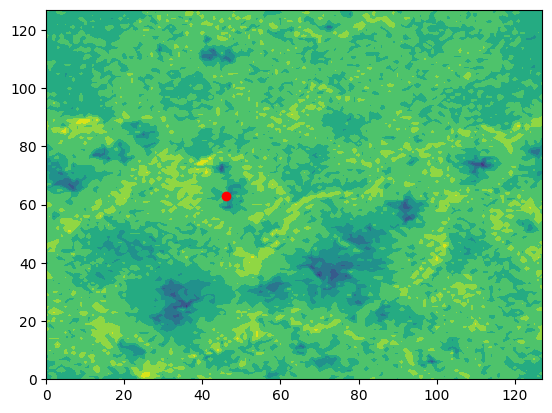

In [10]:
plt.contourf(simu_list[0].dataset_computed_3d.FMSE[25,2].values)
plt.scatter(46, 63, c='r')

In [11]:
diag_test = diagnostic_fmse_z_window(
    fmse_array=simu_list[0].dataset_computed_3d.FMSE.values,
    z_array=simu_list[0].dataset_3d.z.values,
    data_array = simu_list[0].dataset_computed_3d.RHO_W.values,
    time_step=332
)

Processing vertical levels:   0%|          | 0/63 [00:00<?, ?it/s]

Processing vertical levels: 100%|██████████| 63/63 [00:07<00:00,  8.39it/s]


In [64]:
fmse_array_copy = simu_list[0].dataset_computed_3d.FMSE.values
z_array_copy = simu_list[0].dataset_3d.z.values
data_array_copy = simu_list[0].dataset_computed_3d.RHO_W.values
print(type(fmse_array_copy))
print(type(z_array_copy))
print(type(data_array_copy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [62]:
fmse_array__gr=simu_list[0].dataset_computed_3d.FMSE.values,
z_array__gr=simu_list[0].dataset_3d.z.values,
data_array__gr = simu_list[0].dataset_computed_3d.RHO_W.values,

In [63]:
type(fmse_array__gr), type(z_array__gr), type(data_array__gr)

(tuple, tuple, tuple)

In [52]:
fmse_array

(array([[[[336119.84, 334788.94, 335293.53, ..., 333348.9 , 335475.8 ,
           334077.1 ],
          [335789.88, 332066.12, 334367.06, ..., 333131.28, 335120.78,
           334756.5 ],
          [333604.53, 333424.5 , 335453.1 , ..., 333840.72, 336669.22,
           333453.12],
          ...,
          [336719.8 , 333408.62, 333197.06, ..., 335362.12, 334489.22,
           331874.44],
          [334106.6 , 332590.62, 334769.1 , ..., 333927.84, 334144.1 ,
           331291.1 ],
          [334958.78, 331877.62, 332555.44, ..., 332367.8 , 334128.22,
           335655.28]],
 
         [[334389.06, 333698.4 , 334290.84, ..., 332941.44, 334257.62,
           333345.94],
          [335294.97, 331912.44, 332878.28, ..., 332060.5 , 333703.94,
           333983.62],
          [332249.34, 332271.66, 334102.9 , ..., 333163.8 , 336106.4 ,
           332765.84],
          ...,
          [335782.97, 331530.78, 332004.06, ..., 333934.62, 333260.7 ,
           331326.2 ],
          [332573.6 , 33210

In [65]:
for i in tqdm(range(100)):
    diag_test = diagnostic_fmse_z_window(
        fmse_array=fmse_array_copy,
        z_array=z_array_copy,
        data_array = data_array_copy,
        time_step=i
    )







Processing vertical levels: 100%|██████████| 63/63 [00:07<00:00,  8.95it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.22it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.18it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.38it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.20it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.21it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.05it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.63it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.47it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.19it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.33it/s]







Processing vertical levels: 100%|██████████| 63/63 [00:06<00:00,  9.45it/s]







KeyboardInterrupt: 

In [41]:
import concurrent.futures

In [ ]:
diag_test_list

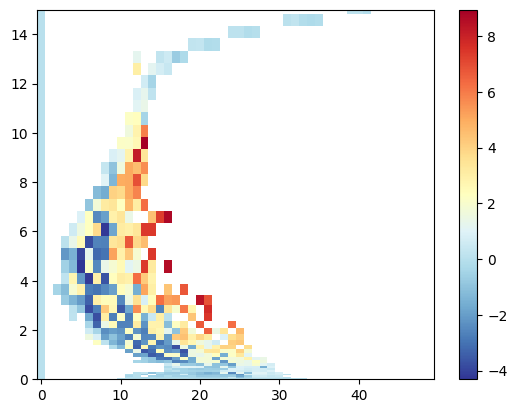

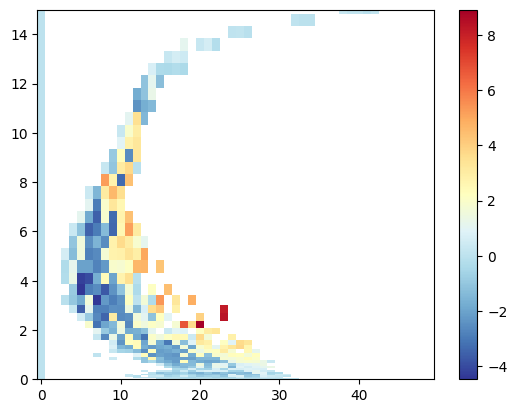

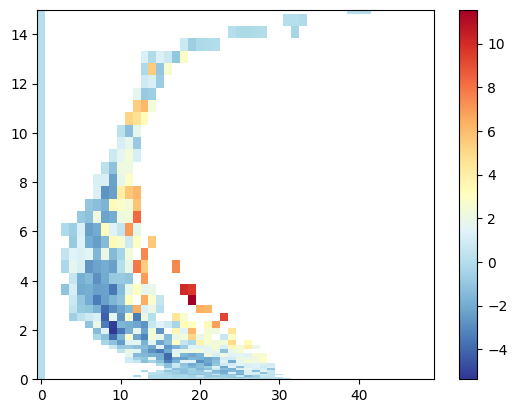

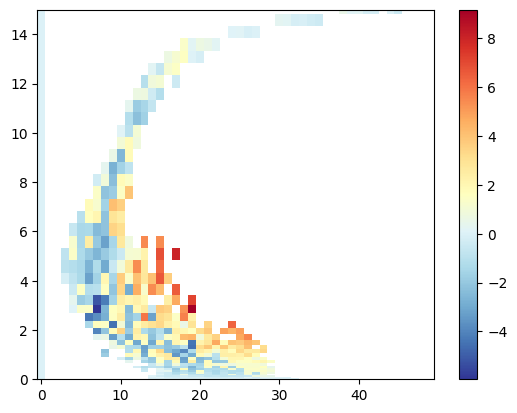

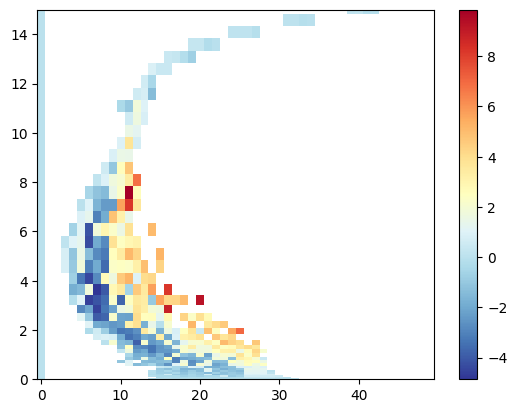

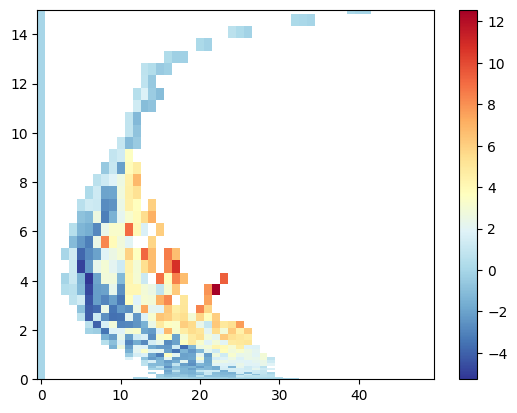

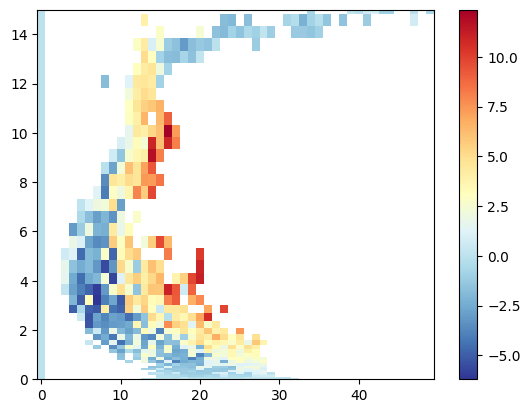

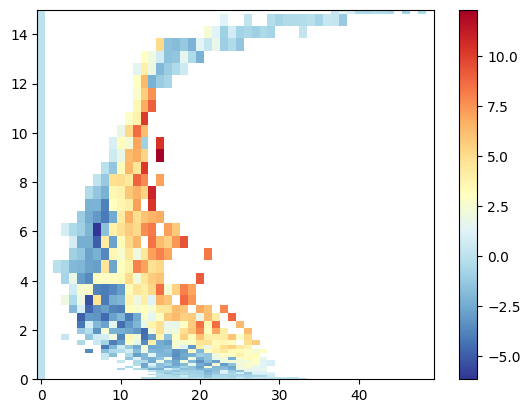

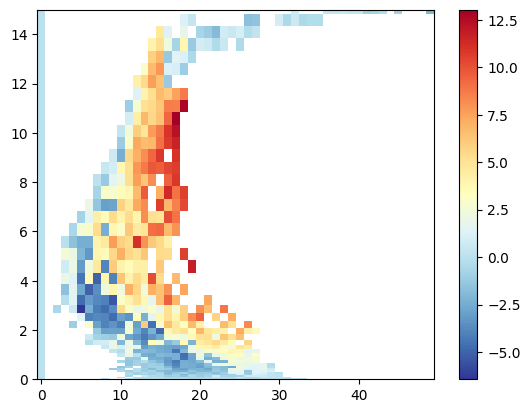

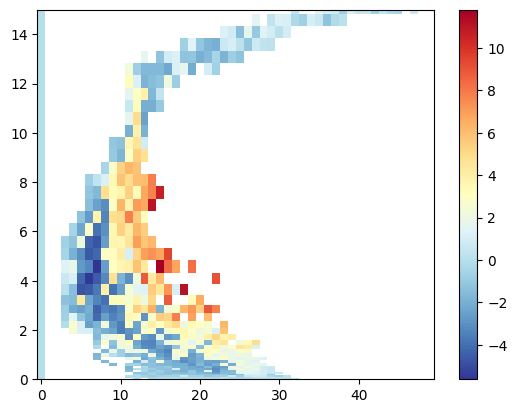

In [43]:
for i in range(10):
    fmse = simu_list[0].dataset_isentropic.fmse.values
    z = simu_list[0].dataset_3d.z.values / 1000
    XX, ZZ = np.meshgrid(fmse, z)
    plt.pcolormesh(XX, ZZ, diag_test_list[i], cmap='RdYlBu_r')#, alpha=0.3)
    plt.colorbar()
    plt.ylim(0, 15)
    plt.show()

In [ ]:
from pySAMetrics.diagnotic_fmse import diagnostic_fmse_z

In [ ]:
diag_previous = diagnostic_fmse_z(
    fmse_array=simu_list[0].dataset_computed_3d.FMSE.values,
    z_array=simu_list[0].dataset_3d.z.values,
    data_array = simu_list[0].dataset_computed_3d.RHO_W.values,
    time_step=332, bin_mode='max'
)

(0.0, 17.0)

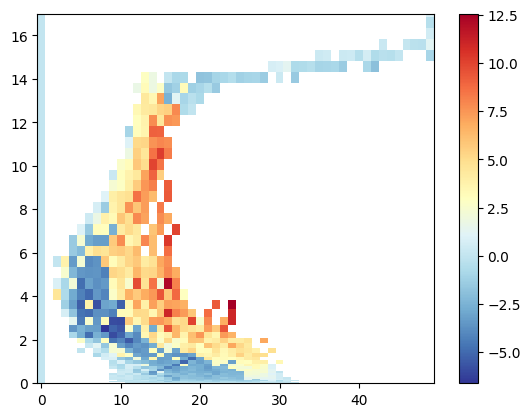

In [ ]:
fmse = simu_list[0].dataset_isentropic.fmse.values
z = simu_list[0].dataset_3d.z.values / 1000
XX, ZZ = np.meshgrid(fmse, z)

plt.pcolormesh(XX, ZZ, diag_previous, cmap='RdYlBu_r')#, alpha=0.3)
plt.colorbar()
plt.ylim(0, 17)

In [20]:
def extract_periodic_subdomain(array, x_center, y_center, nx_sub, ny_sub):
    """
    Extracts a subdomain from a doubly periodic domain around a given center.
    
    Parameters:
    - array: 2D array (image) from which to extract the subdomain.
    - x_center: The x-coordinate of the center of the subdomain.
    - y_center: The y-coordinate of the center of the subdomain.
    - nx_sub: The width of the subdomain.
    - ny_sub: The height of the subdomain.

    Returns:
    - subdomain: The extracted subdomain as a 2D array.
    """
    nx, ny = array.shape  # Full domain size
    
    # Create a grid of indices for the subdomain, considering periodic boundaries
    x_indices = (np.arange(x_center - nx_sub // 2, x_center + nx_sub // 2) % nx)
    y_indices = (np.arange(y_center - ny_sub // 2, y_center + ny_sub // 2) % ny)
    
    # Extract the subdomain
    subdomain = array[np.ix_(x_indices, y_indices)]
    
    return subdomain


import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import warnings
from pySAMetrics import config
from scipy.ndimage import generic_filter
from tqdm import tqdm
from joblib import Parallel, delayed  # For parallelization

def variance_filter(array, nx_sub, ny_sub):
    """Apply a variance filter over the image with a window size of (nx_sub, ny_sub)."""
    return generic_filter(array, np.var, size=(nx_sub, ny_sub))

def find_most_variable_subdomain_via_filter(array_2d, nx_sub, ny_sub):
    """Find the subdomain of size (nx_sub, ny_sub) with the strongest variability using a filter."""
    # Apply a variance filter over the array
    variability_map = variance_filter(array_2d, nx_sub, ny_sub)
    
    # Find the coordinates of the maximum variability
    max_coords = np.unravel_index(np.argmax(variability_map), variability_map.shape)
    
    return max_coords, np.max(variability_map)


In [101]:
from joblib import Parallel, delayed
import numpy as np
from tqdm import tqdm

def compute_sub_fmse(fmse_array, nx_sub, ny_sub, n_jobs=-1):
    """
    Compute the indices ('sub_idx') for the subdomains where FMSE has the greatest variance.

    Parameters:
    - fmse_array: 4D array (nt, nz, nx, ny) of FMSE values.
    - nx_sub: Width of the subdomain.
    - ny_sub: Height of the subdomain.
    - n_jobs: Number of parallel jobs (-1 uses all available cores).

    Returns:
    - sub_idx: Tuple of indices (nt, nz, nx_sub, ny_sub) for subdomains of max variance.
    """
    nt, nz, nx, ny = fmse_array.shape
    
    # To store indices for the subdomains of max variance
    sub_idx = []

    def process_vertical_level(z, t):
        """
        Process a single vertical level at time step t.
        """
        fmse_slice = fmse_array[t, z, :, :]
        (best_x, best_y), _ = find_most_variable_subdomain_via_filter(fmse_slice, nx_sub, ny_sub)
        
        # Calculate the subdomain indices considering periodic boundaries
        x_indices = (np.arange(best_x - nx_sub // 2, best_x + nx_sub // 2) % nx)
        y_indices = (np.arange(best_y - ny_sub // 2, best_y + ny_sub // 2) % ny)
        
        return x_indices, y_indices

    # Parallelize over the time steps and vertical levels
    for t in tqdm(range(nt), desc="Processing time steps"):
        results = Parallel(n_jobs=n_jobs)(
            delayed(process_vertical_level)(z, t) for z in range(nz)
        )

        # Store the indices for each vertical level at time t
        time_indices = []
        for z in range(nz):
            x_indices, y_indices = results[z]
            time_indices.append((x_indices, y_indices))
        sub_idx.append(time_indices)

    # Convert the list of indices to a numpy array (nt, nz, nx_sub, ny_sub)
    sub_idx = np.array(sub_idx)
    
    return sub_idx




def fmse_diagram_on_subdomain(fmse_array, sub_fmse, data_array, time_step, nb_bins_fmse=50, bin_mode='max'):
    """
    Compute FMSE diagnostic for the subdomains.
    
    Parameters:
    - fmse_array: 4D array (nx, ny, nz, nt) of FMSE values.
    - sub_fmse: 4D array (nx_sub, ny_sub, nz, nt) representing subdomains.
    - data_array: 4D array (nx, ny, nz, nt) of data to analyze.
    - time_step: Current time step to analyze.
    - nb_bins_fmse: Number of bins for the FMSE range.
    - bin_mode: Mode to bin the values ('sum', 'mean', 'max').
    
    Returns:
    - output_matrix: 2D array (nz, nb_bins_fmse) containing the FMSE diagnostics.
    """
    nz = sub_fmse.shape[2]
    output_matrix = np.zeros((nz, nb_bins_fmse))

    # Use the diagnostic_fmse_z_window function to process each vertical level
    output_matrix = diagnostic_fmse_z_window(
        fmse_array=fmse_array,
        z_array=sub_fmse[:, :, :, time_step],
        data_array=data_array,
        time_step=time_step,
        nb_bins_fmse=nb_bins_fmse,
        bin_mode=bin_mode,
        nx_sub=sub_fmse.shape[0],
        ny_sub=sub_fmse.shape[1]
    )
    
    return output_matrix



In [95]:
fmse_array = simu_list[0].dataset_computed_3d.FMSE.values

In [133]:
# Compute SUB_FMSE
sub_idx = compute_sub_fmse(fmse_array[:3], nx_sub=64, ny_sub=64)

Processing time steps:   0%|          | 0/3 [00:00<?, ?it/s]

Processing time steps: 100%|██████████| 3/3 [00:46<00:00, 15.35s/it]


In [137]:
sub_idx.shape

(3, 64, 2, 64)

In [156]:
fmse_array[0,1][sub_fmse[0,1,0], sub_fmse[0,1,1]].shape

(64,)

In [146]:
aaa = fmse_array[0,1]

In [147]:
x_id, y_idx = sub_fmse[0,1,0,:],sub_fmse[0,1,1,:]

In [151]:
len(x_id), len(y_idx)

(64, 64)

In [154]:
aaa[x_id,y_idx].shape

(64,)

In [141]:
sub_fmse[0,1,0,:].shape

(64,)

In [144]:
len(sub_fmse[0,1][0]), len(sub_fmse[0,1][1])

(64, 64)

IndexError: index 90 is out of bounds for axis 0 with size 64

In [122]:
sub_fmse[0,1][1]

array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25])

In [ ]:
# Apply FMSE diagnostic to a specific time step
time_step = 0  # Choose your time step
output_matrix = fmse_diagram_on_subdomain(fmse_array=simu_list[0].dataset_computed_3d.FMSE.values,
    z_array=simu_list[0].dataset_3d.z.values,
    data_array = simu_list[0].dataset_computed_3d.RHO_W.values,
    time_step=332)

In [57]:
x_center, y_center = 40,40
# Create a grid of indices for the subdomain, considering periodic boundaries
x_indices = (np.arange(x_center - nx_sub // 2, x_center + nx_sub // 2) % nx)
y_indices = (np.arange(y_center - ny_sub // 2, y_center + ny_sub // 2) % ny)

# Extract the subdomain
sub_indices = np.array(np.meshgrid(x_indices, y_indices, indexing='ij')).T

#sub_fmse[0, 0, :, :] = sub_indices

In [51]:
fmse_array[0,0][sub_indices].shape

(64, 64, 2, 128)

In [44]:
sub_fmse[0, 0, :,:]

array([[ 8.,  9., 10., ..., 69., 70., 71.],
       [ 8.,  9., 10., ..., 69., 70., 71.],
       [ 8.,  9., 10., ..., 69., 70., 71.],
       ...,
       [ 8.,  9., 10., ..., 69., 70., 71.],
       [ 8.,  9., 10., ..., 69., 70., 71.],
       [ 8.,  9., 10., ..., 69., 70., 71.]])

In [42]:
fmse_array

IndexError: arrays used as indices must be of integer (or boolean) type